<a href="https://colab.research.google.com/github/pquispemor/CC2-LAB/blob/main/EDA_Parcial1_paul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Parcial 1 - Algoritmos y Estructura de Datos

Indicaciones: Después de terminar su evaluación, llenar el siguiente formulario con sus respuestas: https://forms.gle/UWej2ueqApBMBMjm6

**Nombre Completo:**

**CUI:**

Parte 1: Dado que una lista enlazada puede representar un polinomio como lo muestra la imagen, se requiere lo siguiente:



1.   Implementar los métodos de la clase **Polinomy** para que las inserciones sean ordenadas de acuerdo al exponente del termino, esto de mayor a menor (de izquierda a derecha) y  sin repeticiones de términos con el mismo exponente, es decir, si tengo dos términos con el mismo exponente estos deben combinar (4x^2 + 6x^2 = 10x^2). 
  
  **Nota**: Solo considerar que los coeficientes serán valores positivos para evitar mayor complejidad.

2.   Que la clase soporte la operación de dos polinomios p1 y p2, y que nos consiga retotar un nuevo polinomio p3.

3.   La clase debe poder evaluar el resultado final al reemplazar su variable independiente, es decir, x = 10 -> 2x^2 + 3x + 1 = 231.



Parte 1:
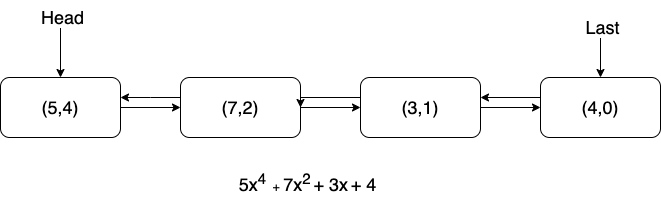






In [ ]:
%%writefile parcial.h

#ifndef POLINOMY_H_
#define POLINOMY_H_

#include<iostream>
#include <string>
#include<bits/stdc++.h>
#include <ctime> 
#include <random>

using namespace std;

class NodeTerm{
  public:
    long int m_Coeff;
    int m_Exp;
    NodeTerm *m_pNext;
    NodeTerm *m_pPrev;
  public:
    NodeTerm(long int c, int e){
      m_Coeff = c;
      m_Exp = e;
      m_pNext = 0;
      m_pPrev = 0;
    }

    long int calculate(int x){
      return m_Coeff*pow(x,m_Exp);
    }
};

class Polinomy{
public:
    NodeTerm * m_pHead;
	  NodeTerm * m_pLast;
public:
    Polinomy(){
      m_pHead = m_pLast = 0;

    }

    void addTermAtLast(long int coeff, int exp)
    {
      //Implementar una funcion que me permita insertar al final del polinomio
    }

    void addTerm(long int coeff, int exp){
      // Implementar una funcion que inserte un nuevo termino en el polinomio de manera ordenanda (el mayor grado va a la izquierda o en la cabeza).
      // Si se tienen dos terminos con el mismo grado, estos se combinan por medio de la adición.
    }

    long int calculate(int x){
      // Implementar método que calcula el valor final del polinomio si reemplazamos la variable independiente X.
    }

    Polinomy operate(Polinomy p2){
      // Implementar un método que opera sobre dos polinomios y me genera uno nuevo.
    }

  
    void print()
    {
      NodeTerm * tmp = m_pHead;
      while(tmp!=0)
      {
        cout<<tmp->m_Coeff<<"X^"<<tmp->m_Exp<<" ";
        tmp = tmp->m_pNext;
      }
      cout<<endl;
    }
};

#endif /* POLINOMY_H_ */

Overwriting parcial.h


In [ ]:
%%writefile main.cpp
#include "parcial.h"

int MINNUMBER = 1;
int MAXNUMBER = 10;
int NUMBER_INSERTIONS = 100;


//Prueba 1: Se evalua si después de varias inserciones el polinomio calcula el valor correcto. (6 puntos)
void Test1(Polinomy p){
  mt19937 mt_coeff(2012);
  mt19937 mt_exp(2016);
  for(int i=0; i < NUMBER_INSERTIONS; i++){
    p.addTerm(MINNUMBER + (mt_coeff()%MAXNUMBER), MINNUMBER +(mt_exp()%MAXNUMBER));
  }

  long int result = 0;
  mt19937 mt_x(2000);
  for(int i=0; i<3; i++){
    int x = MINNUMBER + (mt_x()%MAXNUMBER);
    cout<<"X = "<<x<<endl;
    result = p.calculate(x);
    cout<<"Operation "<<i<<":"<<result<<endl;
  }
}

// Prueba 2: Se comprueba si al hacer varias inserciones sobre 2 polinomios y el reemplezar la variable independiente sobre el resultado de combinar
// estos dos polinomios, el resultado es el correcto. (6 Puntos)
void Test2(Polinomy p1, Polinomy p2){ 
  mt19937 mt_coeff(2012);
  mt19937 mt_exp(2016);
  for(int i=0; i < NUMBER_INSERTIONS; i++){
    p1.addTerm( MINNUMBER + (mt_coeff()%MAXNUMBER), MINNUMBER + (mt_exp()%MAXNUMBER));
    p2.addTerm( MINNUMBER + (mt_coeff()%MAXNUMBER), MINNUMBER + (mt_exp()%MAXNUMBER));
  }

  Polinomy p3 = p1.operate(p2);

  p3.print();
  long  result = 0;
  mt19937 mt_x(2000);
  for(int i=0; i<3; i++){
    int x = MINNUMBER + (mt_x()%MAXNUMBER);
    cout<<"X = "<<x<<endl;
    result = p3.calculate(x);
    cout<<"Operation "<<i<<":"<<result<<endl;
  }
}

int main()
{
    Polinomy p1, p2, p3;
    cout<<"Test 1"<<endl;
    Test1(p1);
    cout<<"Test 2"<<endl;
    Test2(p2,p3);

    return 1;
}

Overwriting main.cpp


In [ ]:

!g++ parcial.h main.cpp  -o main.o
!./main.o



PARTE 2: Pilas y Vectores

Dado que tenemos una estructura de pilas, se quiere implementar una clase que me consiga siempre retornar el Máximo o el Mínimo Punto dentro de la pila en referencia a un punto fijo. Es decir, mi clase siempre tendrá un punto X, donde cada nuevo elemento que iré insertando tendra que ser comparado mediante una distancia **Euclidiana**, de esta manera, puedo saber si los nuevos puntos están mas cerca o mas lejanos de mi punto de referencia X. 

**Nota**: Considerar los ejercicios implementados en clase.

Considerar lo siguiente:

1. La clase no será solo de mínimos o máximos, ahora se pide que se tenga un puntero a una función (pref, p1, p2) donde la función puede variar, es decir, que puede tener una función que puede determinar si p1 es mas cercanos a pf que p2. Dando una flexibilidad de tener una misma clase para determinar puntos cercanos o lejanos.

2. El ejercicio pide implementar dor nuevas funciones para poder tener dos instancias de la clase **PointStack**. Uno para los mas cercanos y otro para los mas lejanos.



In [ ]:
%%writefile parcial_part2.h

#ifndef MAXSTACK_H_
#define MAXSTACK_H_

#include<iostream>
#include <string>
#include<bits/stdc++.h>
#include <ctime> 
#include <tuple>
#include <random>


using namespace std;

class EmptyStack : public runtime_error {
public:
  EmptyStack(const string& msg = "") : runtime_error(msg) {}
};

template <class T>
class Node{
  public:
    T m_Data;
    Node<T> *m_pNext;
  public:
    Node(T d){
      m_Data = d;
      m_pNext = 0;
    }
};

template <class T>
class Stack{
public:
    Node<T> * m_pTop;
public:
    Stack(){
      m_pTop = 0;
    }

    void push(T d)
    {
      Node<T> *pNew = new Node<T>(d);
      if (!m_pTop){
        m_pTop = pNew;
      } else {
        pNew->m_pNext = m_pTop;
        m_pTop = pNew;
      }
    }

    T pop(){
      if (!m_pTop){
        throw EmptyStack("No hay elementos");
      }
      Node<T> *tmp = m_pTop;
      m_pTop = tmp->m_pNext;
      T data = tmp->m_Data;
      delete(tmp);
      return data;
    }

    T top(){
      if (!m_pTop){
        throw EmptyStack("No hay elementos");
      }
      return m_pTop->m_Data;
    }

    bool isEmpty(){
      return m_pTop == 0;
    }

    void print()
    {
      Node<T> * tmp = m_pTop;
      while(tmp!=0)
      {
        cout<<tmp->m_Data<<" ";
        tmp = tmp->m_pNext;
      }
      cout<<endl;
    }
};

class Point{
public:
  float m_X;
  float m_Y; 
  float m_Z;
public:
  Point(){
    m_X = m_Y = m_Z = 0.0;
  }
  Point(float x, float y, float z){
    m_X = x;
    m_Y = y;
    m_Z = z;
  }

  float distance(Point p2){
    // Implementar la funcion distancia euclidiana
  }

  friend ostream& operator<<(ostream& os, const Point& p)
  {
      os << "("<<p.m_X<<", "<<p.m_Y<<", "<<p.m_Z<<")";
      return os;
  }

};


class PointStack{
public:
  Point m_Point;
  bool (*m_compFunc) (Point, Point, Point);
  Stack<Point> m_S;
  Stack<Point> m_auxS;
public:
  PointStack(){
    m_compFunc = 0;
  }
  PointStack(Point p, bool (*compFunc) (Point, Point, Point)){
    m_Point = p;
    m_compFunc = compFunc;
  }

  void push(float x, float y, float z){
   // Implmentar un push a nuestras pilas
  }

  bool isEmpty(){
    return m_S.isEmpty();
  }

  tuple<Point, Point>  pop(){
    // Pueden cambiar a voluntad esta funcion 
    // en el caso de no cambiarlo, una tupla puede ser evaluada usando get<index>(variable tuple), por ejemplo:
    // tuple<point, point> mytuple= make_tuple(p1, p2), donde,
    // get<0>(mytuple) me irá a retornar el valor de p1
    return make_tuple(m_S.pop(), m_auxS.pop());
  }

  float meanDistanceFromN(int n){
    // Implementar una funcion que me determina la diferencia en la distancia promedio de los n ultimos elementos
    // (hacer push de n elementos) y el top de la pila auxiliar después de haber sacado estos n elementos.
    // La diferencia es un valor absoluto.
  }

  void print(){
    cout<<"S:"<<endl;
    m_S.print();
    cout<<"Aux S"<<endl;
    m_auxS.print();
  }
};

// Implementar 2 funciones extras para determinar si son cercanos o lejanos los puntos en relación a un punto de referencia.
//bool func1(Point pref, Point p1, Point p2)
//bool func2(Point pref, Point p1, Point p2)

#endif /* MAXSTACK_H_ */

Overwriting parcial_part2.h


In [ ]:
%%writefile main.cpp
#include "parcial_part2.h"

int MINNUMBER = 1;
int MAXNUMBER = 10;

int NUMBER_POP = 8;
int NUMBER_INSERTIONS = NUMBER_POP*10;


// Prueba 3: Evalua si se implementó dos instancias  para almacenar los puntos mas cercanos y mas distances.
// 8 Puntos  (4 si es correcto para puntos cercanos y 4.5 para mas distantes)

void test(PointStack points, bool (*func)(Point, Point, Point)){
  mt19937 mt_x(2012);
  mt19937 mt_y(2016);
  mt19937 mt_z(2018);

  float x = MINNUMBER + (mt_x()%MAXNUMBER);
  float y = MINNUMBER + (mt_y()%MAXNUMBER);
  float z = MINNUMBER + (mt_z()%MAXNUMBER);

  Point mainPoint(x,y,z);
  points = PointStack(mainPoint, func);


  for(int i=0; i<NUMBER_INSERTIONS; i++)
  {
    float x = MINNUMBER + (mt_x()%MAXNUMBER);
    float y = MINNUMBER + (mt_y()%MAXNUMBER);
    float z = MINNUMBER + (mt_z()%MAXNUMBER);

    points.push(x,y,z);
  }
  
  for(int i = 0; i < 3; i++){
    cout<<"Test "<<i<<":"<<endl;
    cout<<points.meanDistanceFromN(NUMBER_POP)<<endl;
  }
}

int main()
{
    cout<<"_____Min Points___"<<endl;
    PointStack pmin;
    test(pmin, TU_FUNCION);

    cout<<"_____Max Points____"<<endl;
    PointStack pmax;
    test(pmax, TU_FUNCION);
    
    return 1;
}

Overwriting main.cpp


In [ ]:

!g++ parcial_part2.h main.cpp  -o main.o
!./main.o

